In [8]:
from amadeus_helpers import find_flights, clean_flights
import pandas as pd
import matplotlib

In [14]:
# Define query parameters
origin = "SYD"
destination = "LON"
num_adults = 2
departure_range = pd.date_range(start="2023-03-17",end="2023-03-24")
return_range = pd.date_range(start="2023-07-26", end="2023-07-30")



In [15]:
# Verify data converts correctly
departure_date = departure_range[0].strftime("%Y-%m-%d")
departure_date

'2023-03-17'

In [21]:
flights_df = pd.DataFrame(columns=["ID", "Airline", "Number of Stops", "Origin", "Destination",
                                       "Departure", "Arrival", "Duration", "Baggage", "Price", "Currency"])

for departure_date in departure_range:
    # Convert departure date to string
    departure_date = departure_date.strftime("%Y-%m-%d")

    for return_date in return_range:
        # Convert return date to string
        return_date = return_date.strftime("%Y-%m-%d")
        
        # Query database
        flights = find_flights(origin, destination, departure_date, return_date, num_adults)

        # Generate flights dataframe
        flights_df = flights_df.append(clean_flights(flights))



Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...
Loading from file...


In [22]:
# Save to load in future if needed
flights_df.to_csv("./data/output/JGT-search.csv")

In [24]:
# Convert price to float to prepare for plotting
flights_df["Price"] = flights_df["Price"].astype(float)

<AxesSubplot:xlabel='Departure'>

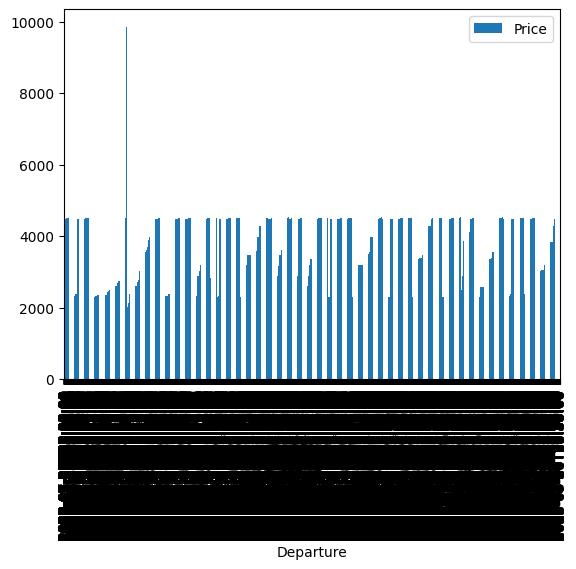

In [25]:
# Take average of price per day, then plot
flights_df.plot(x="Departure", y="Price", kind="bar")